In [ ]:
import pandas as pd
import numpy as np
import nltk
import string
import re
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
from nltk.tokenize import word_tokenize #import word_tokenize for tokenizing text into words 
from nltk.tokenize import sent_tokenize #import sent_tokenize for tokenizing paragraph into sentences
from nltk.stem.porter import PorterStemmer #import Porter Stemmer Algorithm 
from nltk.stem import WordNetLemmatizer #import WordNet lemmatizer 
from nltk.corpus import stopwords #import stopwords


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelBinarizer, OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

from wordcloud import WordCloud, ImageColorGenerator
nltk.download('punkt')
import matplotlib.pyplot as plt

from nltk.stem import LancasterStemmer, SnowballStemmer, RegexpStemmer, WordNetLemmatizer
tweet_df = pd.read_csv("SentimenAnalisis.csv")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
tweet_df.head()

,Unnamed: 0,Unnamed: 0.1,username,tweetcreatedts,text,english,bersih,Subjectivity,Polarity,Sentimen
0,0,0,DRonodipuro,2021-11-17 23:57:23,Daftar penyakit yang perlu perhatian lebih seb...,List of diseases that need more attention befo...,list of diseases that need more attention befo...,0.50,0.5,Positive
1,1,1,nusabalicom,2021-11-17 23:45:25,"Tinggal 5,69 Persen Warga Tabanan Belum Divaks...",Stayed 5.69 percent of Tabanan residents have ...,stayed percent of tabanan residents have not b...,0.00,0.0,Neutral
2,2,2,WantedTeenZ,2021-11-17 23:17:12,#COVID19 : 95.4 peratus populasi dewasa negara...,# COVID19: 95.4 Percentage of complete country...,covid19 percentage of complete country adult p...,0.35,0.1,Positive
3,3,3,AndyTantono,2021-11-17 22:38:17,Sabar! Vaksinasi anak usia 6-11 tahun dimulai ...,Be patient!Vaccination of children aged 6-11 y...,be patientvaccination of children aged number ...,0.40,-0.1,Negative
4,4,4,KontanNews,2021-11-17 22:30:03,Sabar! Vaksinasi anak usia 6-11 tahun dimulai ...,Be patient!Vaccination of children aged 6-11 y...,be patientvaccination of children aged number ...,0.40,-0.1,Negative


In [ ]:
print(tweet_df['Sentimen'])

0      Positive
1       Neutral
2      Positive
3      Negative
4      Negative
         ...   
699     Neutral
700     Neutral
701    Positive
702    Positive
703    Positive
Name: Sentimen, Length: 704, dtype: object


In [ ]:
# Membuat kolom 'Sentiment' jika 'Label' positif maka +1, 'Label' netral maka 0, dan 'label' negatif maka -1
def convert(Sentimen):
  if Sentimen == 'Positive':
    return 1
  elif Sentimen == 'Neutral':
    return 0
  else:
    return -1

tweet_df['Sentimen'] = tweet_df['Sentimen'].apply(convert)

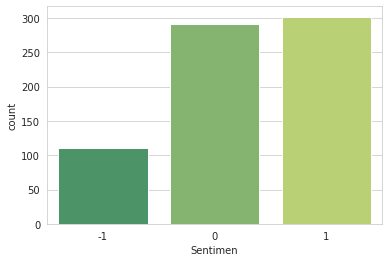

In [ ]:
# Membuat bar chart antara negatif dan positif
sns.set_style('whitegrid')
sns.countplot(x='Sentimen',data=tweet_df, palette='summer')

In [ ]:
# Mengambil beberapa kolom untuk analisis
tweet_df = tweet_df[['bersih' ,'Sentimen']]
tweet_df.head()

,bersih,Sentimen
0,list of diseases that need more attention befo...,1
1,stayed percent of tabanan residents have not b...,0
2,covid19 percentage of complete country adult p...,1
3,be patientvaccination of children aged number ...,-1
4,be patientvaccination of children aged number ...,-1


In [ ]:
X = tweet_df["bersih"].values
y = tweet_df.drop("bersih", axis=1).values

print(X)
print(y)

['list of diseases that need more attention before the vaccine vaccincovid19'
 'stayed percent of tabanan residents have not been vaccinated covid19 vaksincovid19'
 'covid19 percentage of complete country adult population vaccinated'
 'be patientvaccination of children aged number years stas in vaksincovid19'
 'be patientvaccination of children aged number years stas in vaksincovid19'
 'over million malaysian adult populations complete vaccine'
 'covid19 percentage of complete country adult population vaccinated'
 'over million malaysian adult populations complete vaccine'
 'covid19 percentage of complete country adult population vaccinated'
 'si sambengin the pemalang multipurpose housemonday  saturday at  wibsafe and halal vaccine ariwibowo202'
 'immediately the vaccine comes soon every monday  saturday in pemalangs multipurpose building ariwibowo202'
 'lets finish the chain of the covid19 virus spread through the stages of the vaccinealhamdulillah already vaccine to  iloindonesiajap

In [ ]:
# Melakukan Split test dan train, 20% untuk test (pengujian) data dan 80% untuk train (pelatihan) data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(563,)
(141,)
(563, 1)
(141, 1)


In [ ]:
vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [ ]:
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
#Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive bayes
modelnb = GaussianNB()
# Memasukkan data training pada fungsi klasifikasi naive bayes
nbtrain = modelnb.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Menentukan hasil prediksi dari x_test
y_pred = nbtrain.predict(X_test)

y_pred

array([ 0,  0,  1,  0,  1,  1,  0,  1,  0,  1,  1,  1,  0,  1,  0,  1,  1,
       -1, -1,  1,  1,  0,  1,  1,  1, -1, -1,  0,  0,  1, -1, -1,  1,  0,
        1, -1,  0,  1,  0, -1,  0,  1,  0, -1,  1,  1,  1,  0,  1,  1,  1,
        1,  1,  0,  1,  1,  0,  0,  1,  0,  0,  0,  1,  1, -1, -1,  1,  0,
        1,  0,  1,  0, -1,  1,  1,  0, -1,  1,  1,  0,  1,  0,  0,  1,  0,
        1,  1,  1,  0,  1,  1,  0,  1,  0,  1,  0,  0, -1, -1,  0,  0,  1,
        1,  1,  1,  0,  0,  0,  1,  1,  0,  0,  1,  1,  0,  0,  1,  1,  0,
        1,  1,  0,  1,  0,  1,  1,  1,  1, -1,  0,  1,  1,  1,  0, -1,  1,
        0,  0,  0,  0,  0])

In [ ]:
# Menghitung nilai akurasi dari klasifikasi naive bayes 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.88      0.79      0.83        19
           0       0.89      0.75      0.81        64
           1       0.74      0.90      0.81        58

    accuracy                           0.82       141
   macro avg       0.84      0.81      0.82       141
weighted avg       0.83      0.82      0.82       141



In [ ]:
# Menentukan akurasi NaiveBayes
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Naive Bayes : ",accuracy)

Akurasi Naive Bayes :  0.8156028368794326


# **Menampilkan WordCloud**

In [ ]:
# Membuat 2 kolom untuk mencari kata terbanyak
df = tweet_df[['bersih', 'Sentimen']]
df.head()

,bersih,Sentimen
0,list of diseases that need more attention befo...,1
1,stayed percent of tabanan residents have not b...,0
2,covid19 percentage of complete country adult p...,1
3,be patientvaccination of children aged number ...,-1
4,be patientvaccination of children aged number ...,-1


In [ ]:
positif = df[df['Sentimen']== 1]
netral = df[df['Sentimen']== 0]
negatif = df[df['Sentimen']== -1]

print(positif)
print(netral)
print(negatif)

                                                bersih  Sentimen
0    list of diseases that need more attention befo...         1
2    covid19 percentage of complete country adult p...         1
5    over million malaysian adult populations compl...         1
6    covid19 percentage of complete country adult p...         1
7    over million malaysian adult populations compl...         1
..                                                 ...       ...
690  healthy indonesia with covid19 vaccine vaksnco...         1
697  steady million doses of covid vaccine are inje...         1
701  top news merdeka rakyat newspapermore vaccine ...         1
702  healthy indonesia with covid19 vaccine vaksnco...         1
703  healthy indonesia with covid19 vaccine vaksnco...         1

[302 rows x 2 columns]
                                                bersih  Sentimen
1    stayed percent of tabanan residents have not b...         0
9    si sambengin the pemalang multipurpose housemo...         0
1

In [ ]:
tweet = df.bersih.str.cat(sep=' ')

#melakukan Tokenisasi
tokens = word_tokenize(tweet)
vocabulary = set(tokens)

# Melihat ada berapa kata dalam file "vaksin.csv"
print((len(vocabulary)))
print()

# Melihat 10 kata teratas
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:10]

1935



['the',
 'of',
 'covid19',
 'vaccine',
 'in',
 'to',
 'and',
 'vaccination',
 'a',
 'complete']

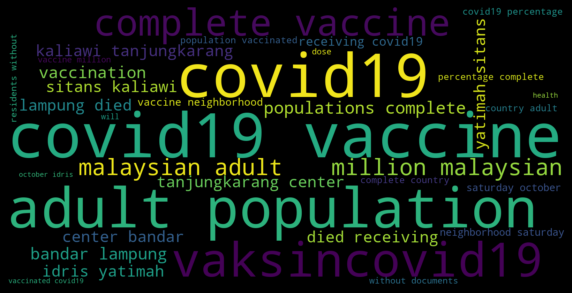

In [ ]:
# Melihat kata terbanyak dengan WordCloud
allWords = ' '.join([a for a in df['bersih']])
wordCloud = WordCloud(width=1600, height=800, random_state=30, max_font_size=200, min_font_size=20).generate(allWords)
plt.figure( figsize=(10,10), facecolor='k')
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# **Decision Tree**

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred)
print("Decision Tree : ",accuracy1)

Decision Tree :  0.8652482269503546


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred)
print("Random Forest : ",accuracy2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Random Forest :  0.8865248226950354
